In [1]:
from google.colab import files
uploaded = files.upload()

Saving historical_data.csv to historical_data.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving fear_greed_index.csv to fear_greed_index.csv


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

In [4]:
trader_df = pd.read_csv("historical_data.csv")
sentiment_df = pd.read_csv("fear_greed_index.csv")

In [6]:
trader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [7]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [13]:
trader_df.columns = trader_df.columns.str.strip().str.lower().str.replace(" ", "_")
sentiment_df.columns = sentiment_df.columns.str.strip().str.lower()

In [17]:
trader_df.columns

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp'],
      dtype='object')

In [16]:
sentiment_df.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [18]:
trader_df['timestamp_ist'] = pd.to_datetime(
    trader_df['timestamp_ist'],
    format="%d-%m-%Y %H:%M",
    errors='coerce'
)

trader_df['date'] = trader_df['timestamp_ist'].dt.date

In [19]:
trader_df['date'].head()

,date
0,2024-12-02
1,2024-12-02
2,2024-12-02
3,2024-12-02
4,2024-12-02


In [20]:
trader_df[['timestamp_ist', 'date']].head()

,timestamp_ist,date
0,2024-12-02 22:50:00,2024-12-02
1,2024-12-02 22:50:00,2024-12-02
2,2024-12-02 22:50:00,2024-12-02
3,2024-12-02 22:50:00,2024-12-02
4,2024-12-02 22:50:00,2024-12-02


In [21]:
trader_df['timestamp_ist'].isna().sum()

np.int64(0)

In [22]:
trader_df = trader_df.dropna(subset=['timestamp_ist'])

In [23]:
trader_df.head()

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


In [24]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

In [25]:
sentiment_df['date'].head()

,date
0,2018-02-01
1,2018-02-02
2,2018-02-03
3,2018-02-04
4,2018-02-05


In [26]:
trader_df['is_profit'] = trader_df['closed_pnl'] > 0

In [27]:
trader_df['is_profit'].head()

,is_profit
0,False
1,False
2,False
3,False
4,False


In [28]:
merged_df = trader_df.merge(
    sentiment_df[['date', 'classification', 'value']],
    on='date',
    how='left'
)

In [29]:
merged_df.head()

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date,is_profit,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,False,Extreme Greed,80.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,False,Extreme Greed,80.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,False,Extreme Greed,80.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,False,Extreme Greed,80.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,False,Extreme Greed,80.0


In [30]:
merged_df['classification'].value_counts()

,count
classification,
Fear,61837
Greed,50303
Extreme Greed,39992
Neutral,37686
Extreme Fear,21400


In [31]:
merged_df.groupby('classification')['closed_pnl'].mean().sort_values()

,closed_pnl
classification,
Neutral,34.307718
Extreme Fear,34.537862
Greed,42.743559
Fear,54.290400
Extreme Greed,67.892861


In [32]:
merged_df.groupby('classification')['is_profit'].mean() * 100

,is_profit
classification,
Extreme Fear,37.060748
Extreme Greed,46.494299
Fear,42.076750
Greed,38.482794
Neutral,39.699093


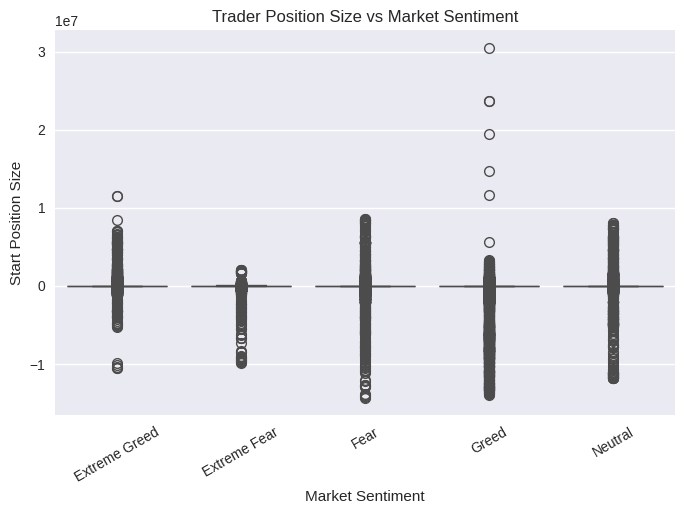

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=merged_df,
    x='classification',
    y='start_position'
)
plt.title("Trader Position Size vs Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Start Position Size")
plt.xticks(rotation=30)
plt.show()

In [34]:
merged_df.groupby('classification')['size_usd'].mean().sort_values()

,size_usd
classification,
Extreme Greed,3112.251565
Neutral,4782.732661
Extreme Fear,5349.731843
Greed,5736.884375
Fear,7816.109931


In [35]:
pd.crosstab(
    merged_df['classification'],
    merged_df['side'],
    normalize='index'
) * 100

side,BUY,SELL
classification,,
Extreme Fear,51.098131,48.901869
Extreme Greed,44.858972,55.141028
Fear,48.951275,51.048725
Greed,48.855933,51.144067
Neutral,50.334342,49.665658


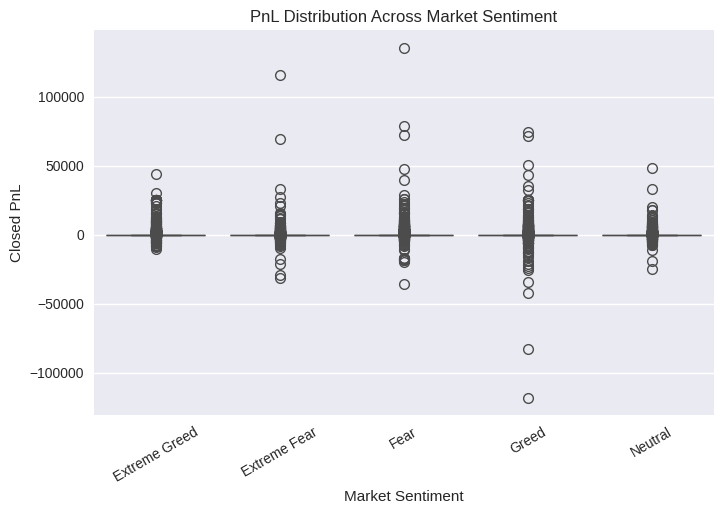

In [36]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=merged_df,
    x='classification',
    y='closed_pnl'
)
plt.title("PnL Distribution Across Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")
plt.xticks(rotation=30)
plt.show()

In [37]:
extreme_df = merged_df[
    merged_df['classification'].isin(['Extreme Fear', 'Extreme Greed'])
]

extreme_df.groupby('classification')['closed_pnl'].mean()

,closed_pnl
classification,
Extreme Fear,34.537862
Extreme Greed,67.892861


In [38]:
merged_df.to_csv("processed_trader_sentiment_data.csv", index=False)